<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/happy.png?raw=true" width=800 align="left"/>

# 실습 내용

- Happy 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


**데이터 설명**

- income: 수입 (단위: 10,000$)
- happiness: 행복 정도 (1~ 10)

In [ ]:
# 하위 몇 개 행 확인
data.tail()

In [ ]:
# 기술통계 확인
data.describe()

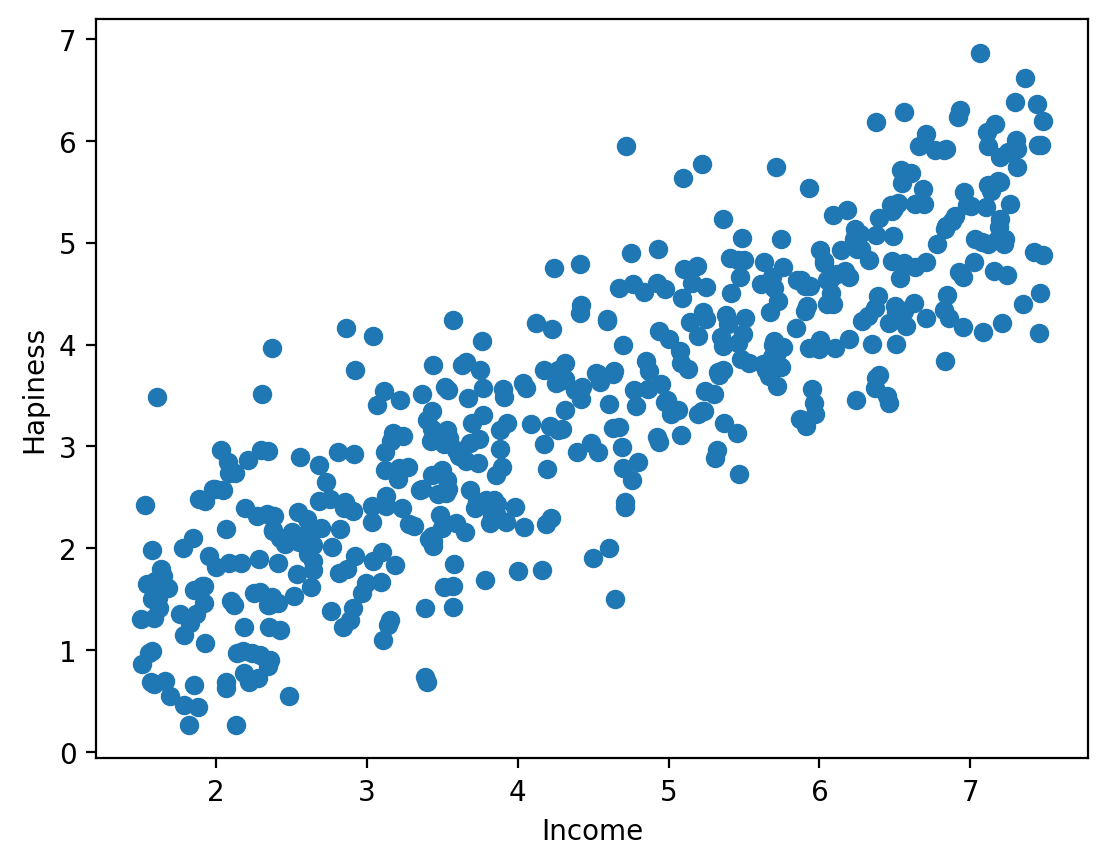

In [4]:
# Income --> Happiness 관계
plt.scatter(x='income', y='happiness', data=data)
plt.xlabel('Income')
plt.ylabel('Hapiness')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target ='happiness'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:, target]


**2) 학습용, 평가용 데이터 분리**

In [6]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [7]:
# 1단계: 불러오기
# 수입 -> 행복도 , 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [8]:
# 2단계: 선언하기
model = LinearRegression()

In [9]:
# 3단계: 학습하기
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [11]:
# 5단계: 평가하기
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('r2 : ', r2_score(y_test, y_pred))

# 실제값과 0.55 의 평균 오차를 가지며
# 평균 행복도 보다 72% 더 나은 설명력을 지닌다.

MAE :  0.559052699014567
r2 :  0.7286654995079597


In [12]:
# 회귀계수 확인
print('가중치 :', model.coef_)
print('편향 :', model.intercept_)


가중치 : [0.7304996]
편향 : 0.09298535775995109


$$\large Happiness = 0.09 + 0.73*Income$$

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

In [30]:
# 회귀식 만들기, y = ax + b
a = model.coef_
b = model.intercept_
income = np.linspace(X_test.min(), X_test.max(), 10)
happiness = a*income + b

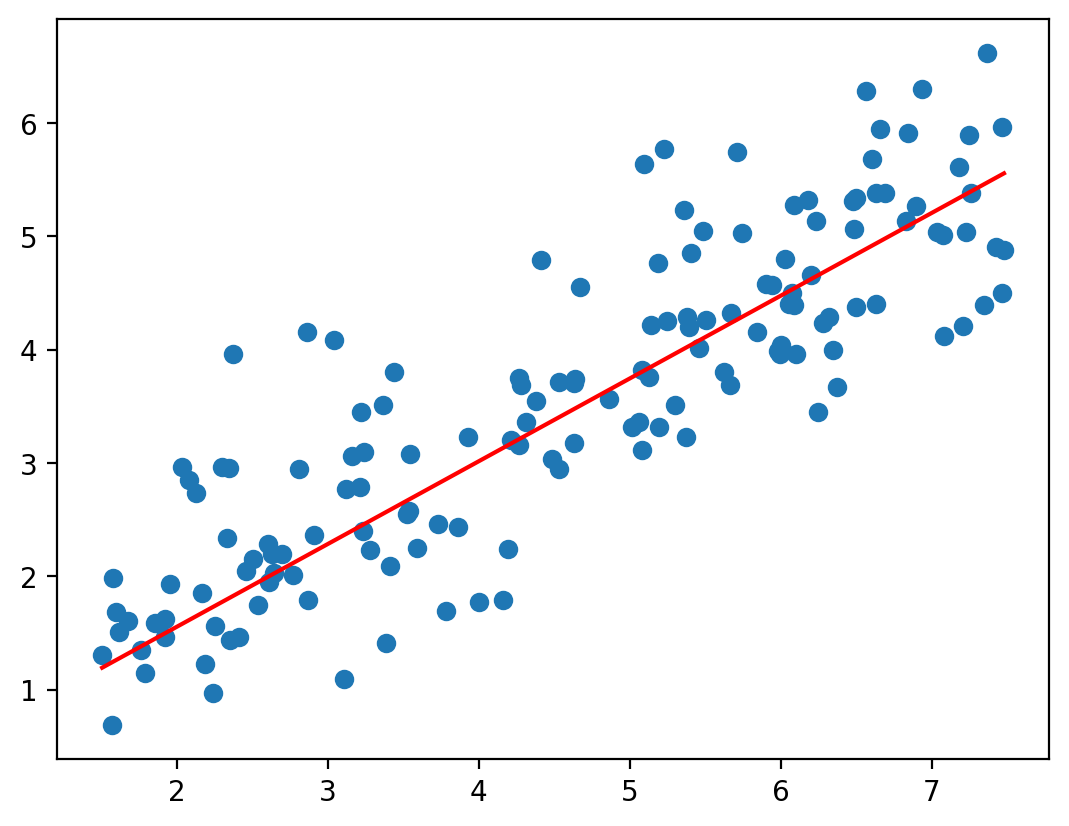

In [32]:
plt.scatter(X_test, y_test)
plt.plot(income, happiness, color='r')

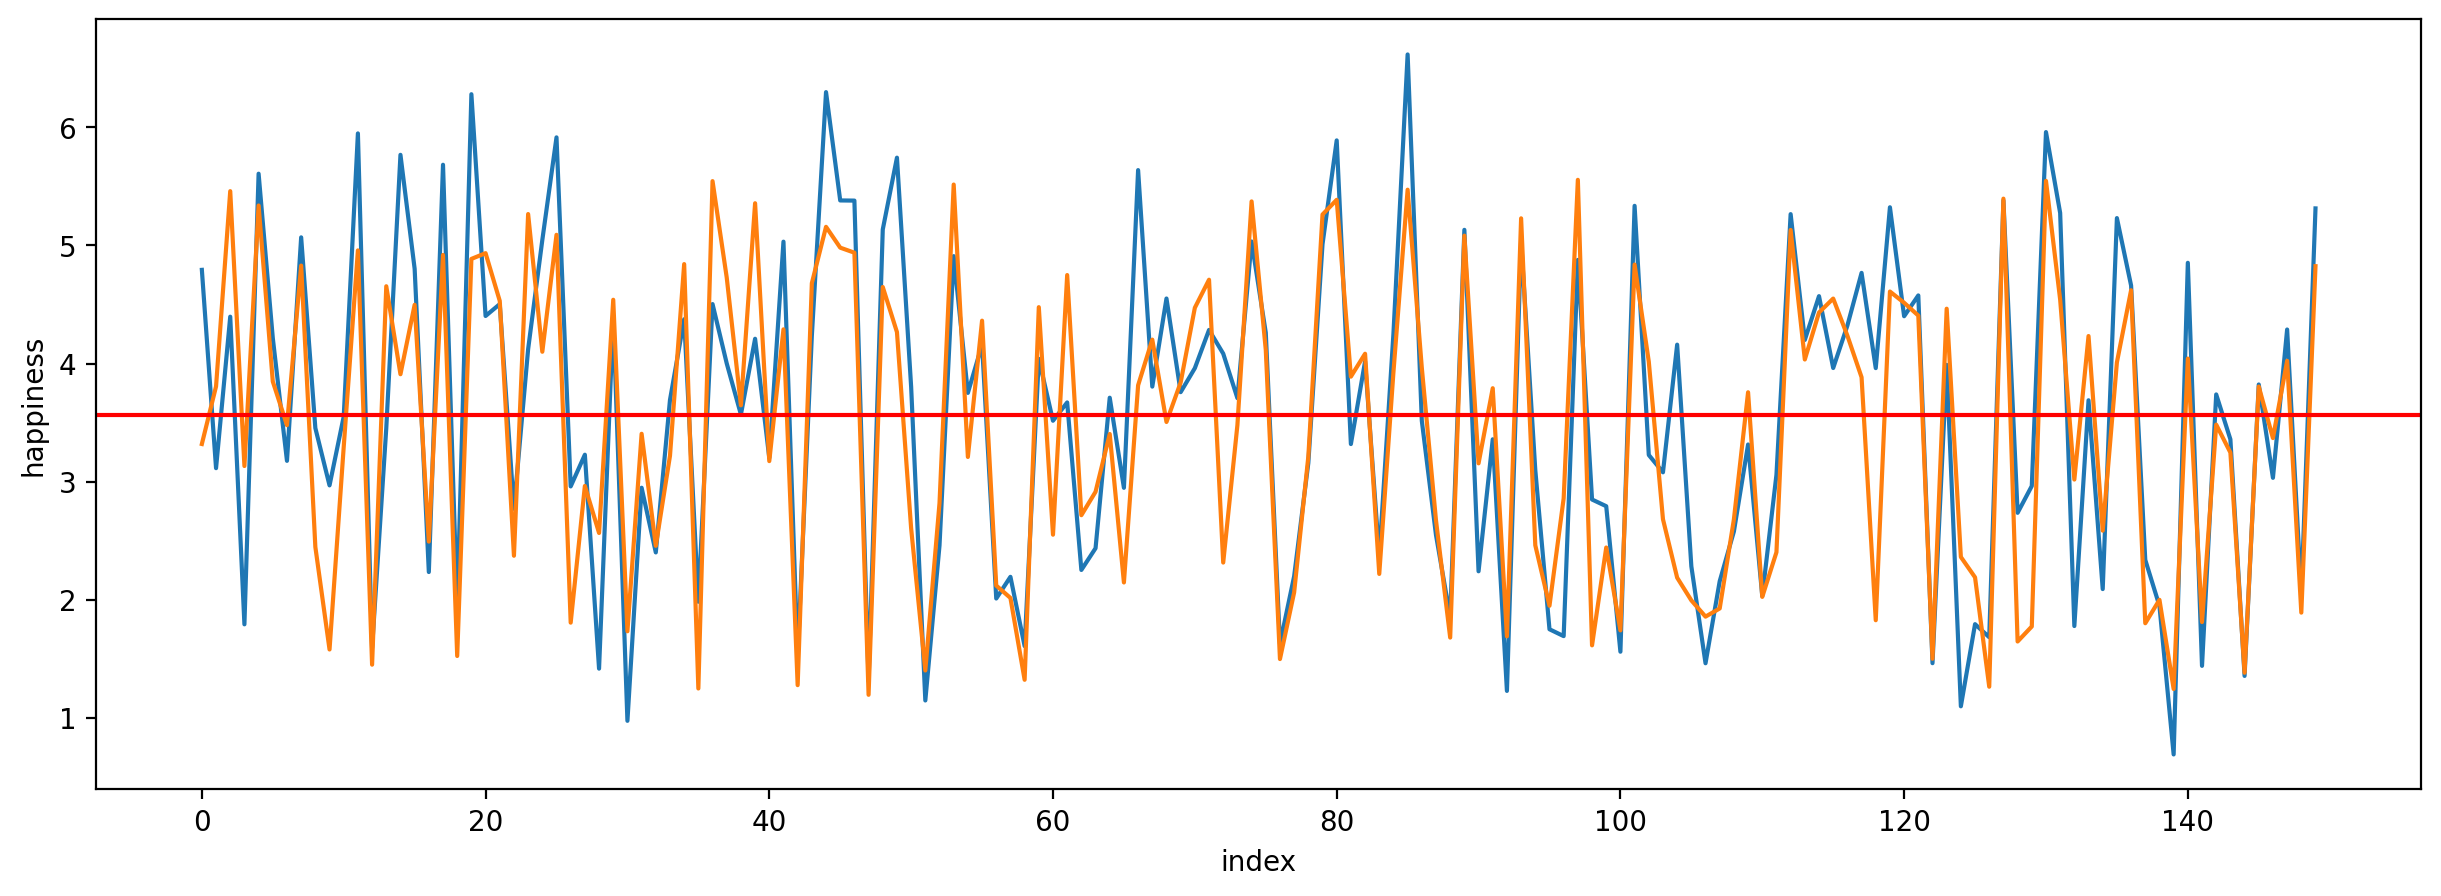

In [21]:
# 예측값, 실제값 시각화
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label ="실제값")
plt.plot(y_pred, label ="예측값")

plt.axhline(y_test.mean(), color='r')

plt.xlabel('index')
plt.ylabel('happiness')
plt.show()



